<a href="https://colab.research.google.com/github/Incredible88/Fama-French-3-factors/blob/main/FF3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asset pricing Model: CAPM vs Fama-French 3 factors Program
Project in Programming with Advanced Computer Languages 2023  
St.Gallen MAY 2023  
Project description:  
Download the Fama-French portfolios and the Fama-French factors from Kenneth French’s home-page. Use the equally weighted portfolios, monthly data for 1960-today. Construct excess returns of the portfolios by subtracting the risk-free rate. Reproduce the figures below (taken from J.H.Cochrane, asset pricing, chapter 20).
  
Run CAPM regressions on the excess returns, where Mkt-RF is taken to be the market excess
return. Plot the results (a scatter plot of predicted against actual average excess returns).
  
Run Fama-French regressions (adding SMB and HML to the CAPM regressions, which already
are excess returns). Plot the results (a scatter plot of predicted against actual average excess
returns.
  



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [4]:
data_FF = pd.read_csv('https://raw.githubusercontent.com/Incredible88/Fama-French-3-factors/main/F-F_Research_Data_Factors%201960-2022.csv')
data_Pf = pd.read_csv('https://raw.githubusercontent.com/Incredible88/Fama-French-3-factors/main/25_Portfolios_5x5%201960-2022.csv')

In [5]:
data_FF = data_FF.iloc[:, 1:]
data_Pf = data_Pf.iloc[:, 1:]

In [6]:
data_Pf_Rf = data_Pf.copy()

# Get the number of months and portfolios
T = data_Pf.shape[0]
N = data_Pf.shape[1]

# Calculate the excess returns of the portfolios by subtracting the risk-free rate
for i in range(N):
  for j in range(T):
    temp = data_Pf.iloc[j, i] - data_FF.iloc[j, 0]
    data_Pf_Rf.iloc[j, i] = temp

## Get the excess return

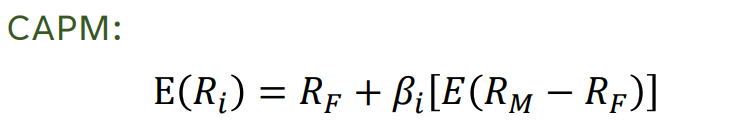

In [7]:
sp_h_exp = np.mean(data_FF['Mkt'])
sp_h_stdev = np.sqrt(np.var(data_FF['Mkt']))
X = np.column_stack((np.ones(T),data_FF['Mkt-RF'])) # X of regression
betaRegress = np.zeros(N)
excess_re = np.zeros(N)
predicted_return_1factor = np.zeros(N)

for i in range(N):
  temp = np.linalg.lstsq(X, data_Pf_Rf.iloc[:,i], rcond=None)[0]
  betaRegress[i] = temp[1] # Beta of the investment by regression
  excess_re[i] = np.mean(data_Pf_Rf.iloc[:,i]) # Excess return for each portfolio
  predicted_return_1factor[i] = betaRegress[i] * np.mean(data_FF['Mkt-RF'])

## Plotting actual excess return vs. predicted excess return

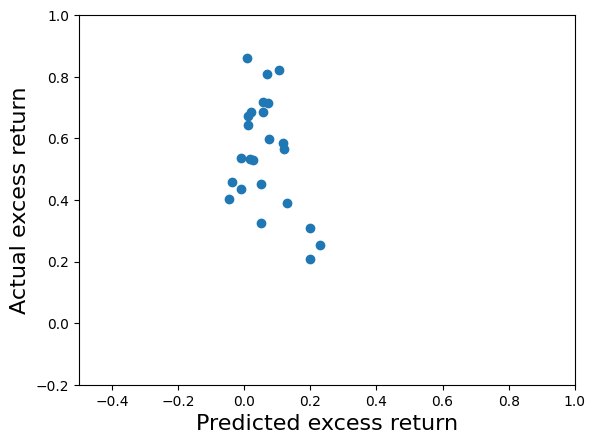

In [8]:

fig1 = plt.scatter(predicted_return_1factor, excess_re)
plt.xlabel('Predicted excess return', fontsize=16)
plt.ylabel('Actual excess return', fontsize=16)
plt.xlim([-0.5, 1])
plt.ylim([-0.2, 1])
plt.show()

## Initial graph. Plotting excess return vs. market beta--CAPM (beta market risk)

(-0.2, 1.0)

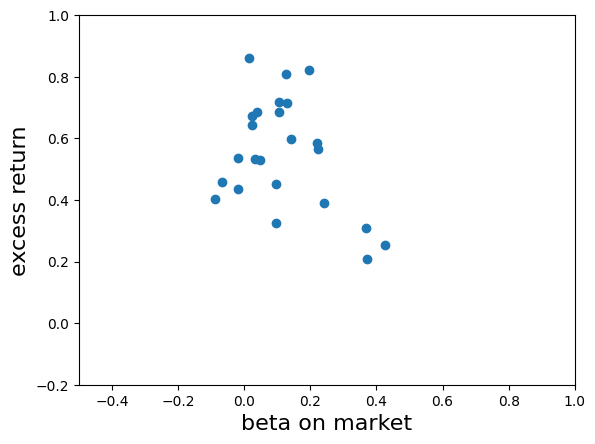

In [19]:
fig2 = plt.scatter(betaRegress, excess_re)
plt.xlabel('beta on market', fontsize=16)
plt.ylabel('excess return', fontsize=16)
plt.xlim([-0.5, 1])
plt.ylim([-0.2, 1])

## Plotting excess return vs. market beta. 


### Lines connect portfolios with different size category within book to market categories in different marker

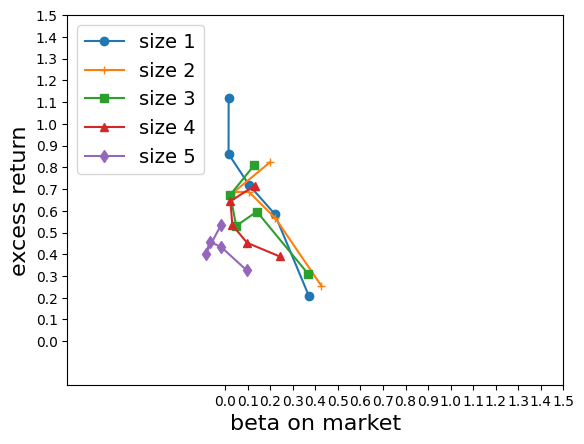

In [10]:
plt.plot(betaRegress[0:5], excess_re[0:5], "o-")
plt.plot(betaRegress[5:10], excess_re[5:10], "+-")
plt.plot(betaRegress[10:15], excess_re[10:15], "s-")
plt.plot(betaRegress[15:20], excess_re[15:20], "^-")
plt.plot(betaRegress[20:25], excess_re[20:25], "d-")
plt.xlabel('beta on market', fontsize=16)
plt.ylabel('excess return', fontsize=16)
plt.xlim([-0.7, 1])
plt.ylim([-0.2, 1])
plt.xticks([i/10 for i in range(0, 16)])
plt.yticks([i/10 for i in range(0, 16)])
plt.legend(['size 1', 'size 2', 'size 3', 'size 4', 'size 5'],
fontsize=14, loc='upper left', ncol=1)

### With different "book to market" categories within size categories different marker

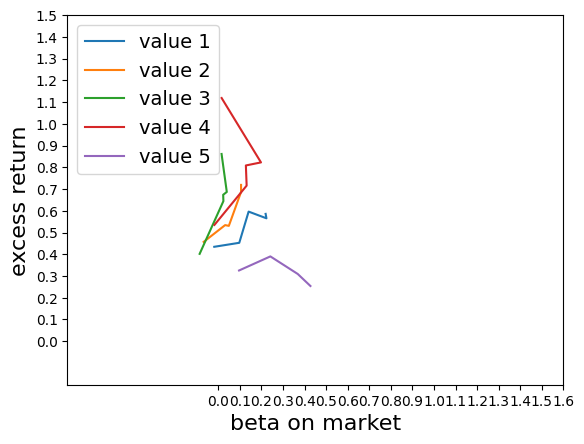

In [11]:
for k in [1,2,3,4,5]:
    x = list(range(k, 25, 5))
    plt.plot(betaRegress[x],excess_re[x])
    
plt.xlabel('beta on market', fontsize=16)
plt.ylabel('excess return', fontsize=16)
plt.xlim([-0.7, 1])
plt.ylim([-0.2, 1])
plt.xticks(np.arange(0, 1.7, 0.1))
plt.yticks(np.arange(0, 1.6, 0.1))
plt.legend(['value 1', 'value 2', 'value 3', 'value 4', 'value 5'],
           fontsize=14, loc='upper left', ncol=1)
plt.show()

# Fama-French 3 factors Regression

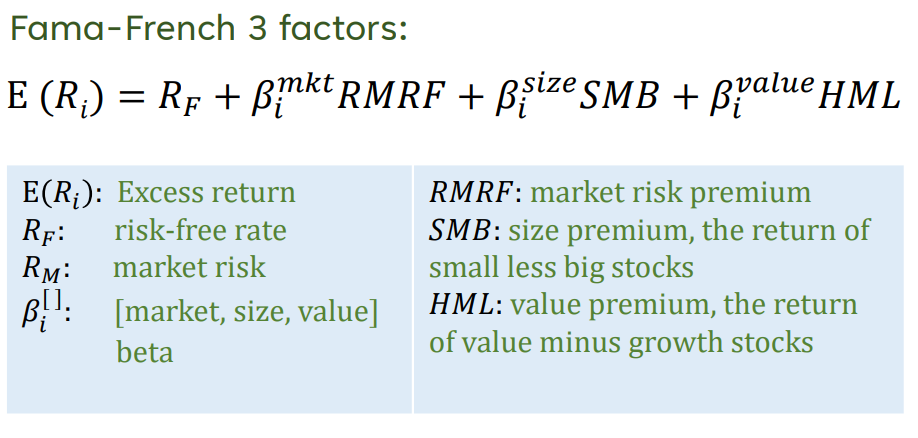

In [12]:

X3 = np.concatenate((np.ones((T,1)), data_FF.iloc[:,0:3]), axis=1) # X for regression 1 for investment's alpha with other three factors
k = 3
coefficient_FF = np.zeros((1,N)) # Investment's alpha
return_hat_3factors = np.zeros((1,N)) # To store the result of return from regression of FF3
betaRegressF = np.zeros((k,N)) # To store 3 beta from reggression of FF3
mean_3_factors = np.mean(data_FF.iloc[:,0:3], axis=0) # Mean of 3 factors
for i in range(N):
    temp = np.linalg.lstsq(X3, data_Pf_Rf.iloc[:,i], rcond=None)[0]
    coefficient_FF[0,i] = temp[0]
    betaRegressF[:,i] = temp[1:]
    x = temp[1:]
    f = x * mean_3_factors
    return_hat_3factors[0,i] = sum(f)


## Fama-French 3 factors plotting
Plot the results (a scatter plot of predicted against actual average excess returns.)

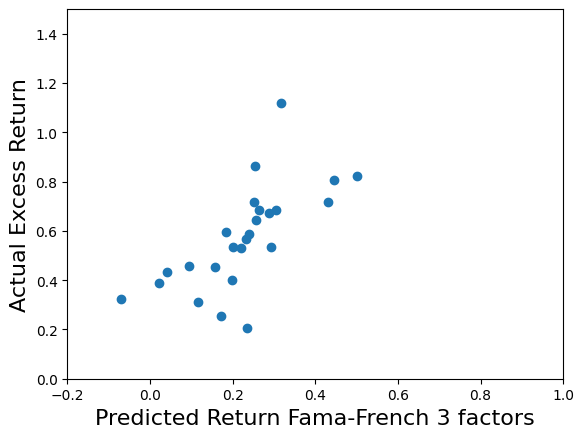

In [31]:
# Plot the results (a scatter plot of predicted against actual average excess returns.)
import matplotlib.pyplot as plt

fig3_1 = plt.scatter(return_hat_3factors, excess_re)
plt.xlabel('Predicted Return Fama-French 3 factors', fontsize=16)
plt.ylabel('Actual Excess Return', fontsize=16)
plt.xlim([-0.2, 1])
plt.ylim([0, 1.5])
plt.show()


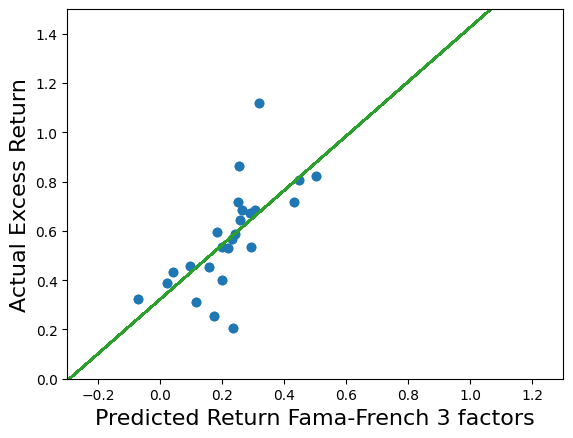

In [32]:
m, b = np.polyfit(return_hat_3factors.reshape([25,]), excess_re, 1)
plt.plot(return_hat_3factors.reshape([25,]), excess_re, 'o')
plt.plot(X, m*X + b)
fig3_1 = plt.scatter(return_hat_3factors, excess_re)
plt.xlabel('Predicted Return Fama-French 3 factors', fontsize=16)
plt.ylabel('Actual Excess Return', fontsize=16)
plt.xlim([-0.3, 1.3])
plt.ylim([0, 1.5])
plt.show()

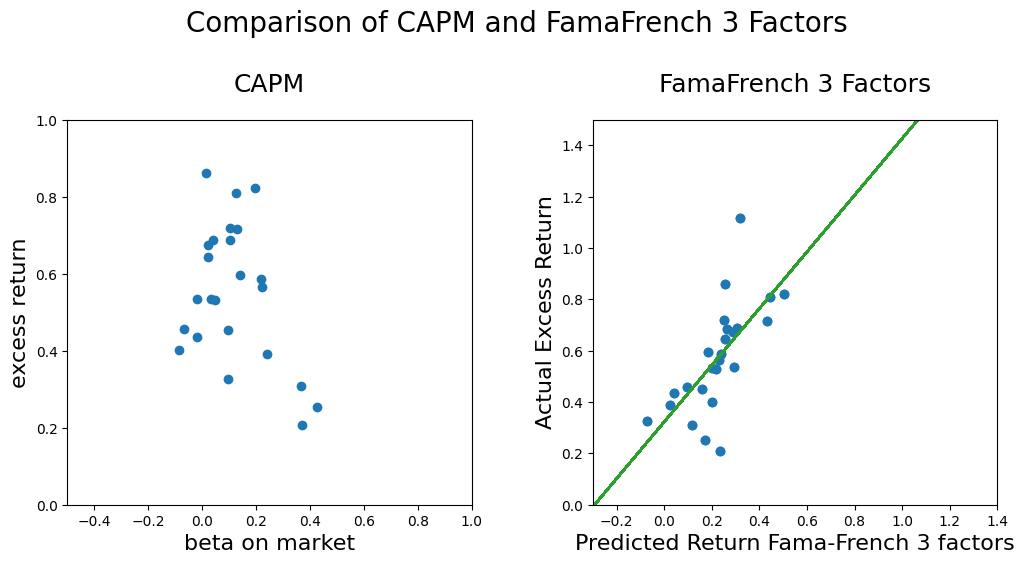

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(betaRegress, excess_re)
ax1.set_xlabel('beta on market', fontsize=16)
ax1.set_ylabel('excess return', fontsize=16)
ax1.set_xlim([-0.5, 1])
ax1.set_ylim([0, 1])
ax1.set_title('CAPM', fontsize=18,y=1.05)


m, b = np.polyfit(return_hat_3factors.reshape([25,]), excess_re, 1)
ax2.plot(return_hat_3factors.reshape([25,]), excess_re, 'o')
ax2.plot(X, m*X + b)
fig3_1 = ax2.scatter(return_hat_3factors, excess_re)
ax2.set_xlabel('Predicted Return Fama-French 3 factors', fontsize=16)
ax2.set_ylabel('Actual Excess Return', fontsize=16)
ax2.set_xlim([-0.3, 1.4])
ax2.set_ylim([0, 1.5])
ax2.set_title('FamaFrench 3 Factors', fontsize=18,y=1.05)

plt.suptitle('Comparison of CAPM and FamaFrench 3 Factors', fontsize=20,y = 1.1)

plt.subplots_adjust(wspace=0.3)

plt.show()


## Fama-French 3 factors model is better at explaining the average excess return of 25 portfolios than CAPM